# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Знаю, что можно написать через try..except, но пока не делаю проекты локально.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

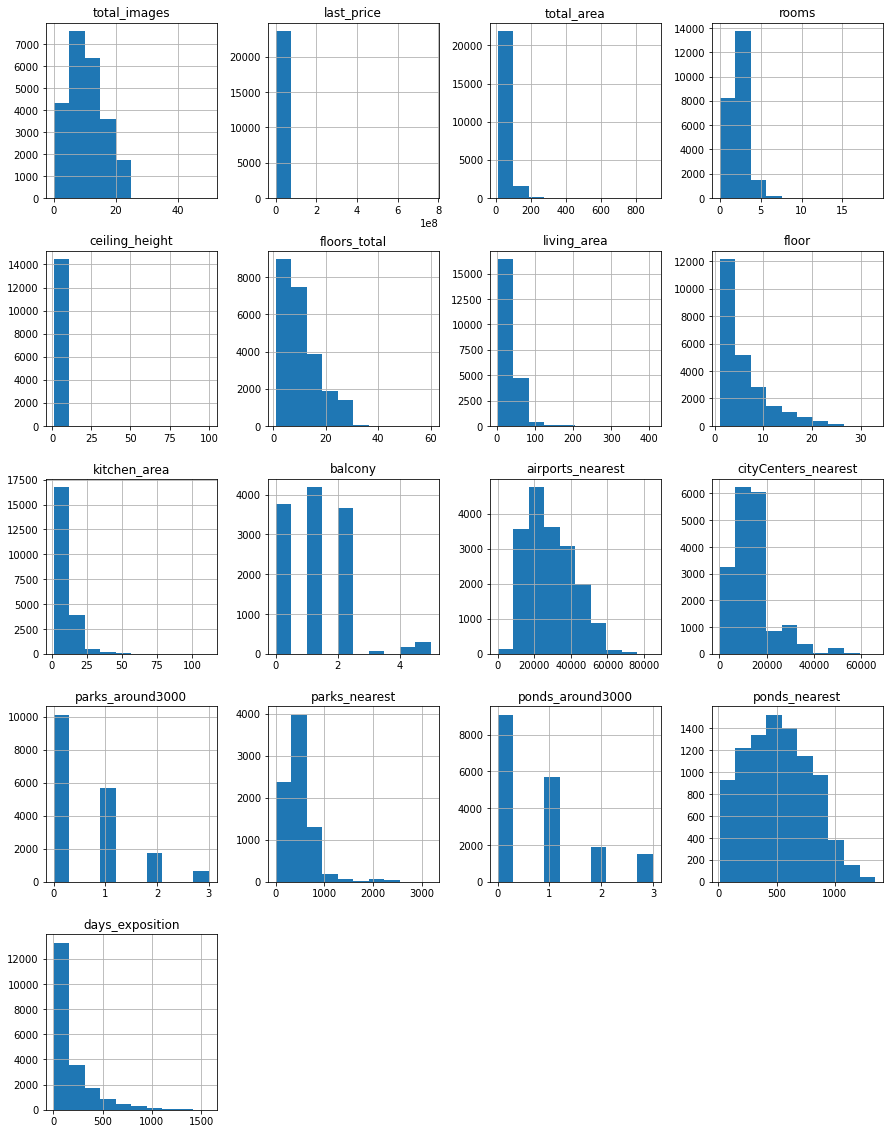

In [5]:
data.hist(figsize=(15, 20))

На данном этапе не увидел ошибок в данных по диаграммам, но увидел, что есть пропуски.

### Предобработка данных

In [6]:
data.isna().sum() #Считаю количество пропусков в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data = data.dropna(subset=['locality_name', 'floors_total'])

In [8]:
for col in data['locality_name'].unique():
    data.loc[(data['locality_name'] == col) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] =\
    data.loc[(data['locality_name'] == col) & ~(data['cityCenters_nearest'].isna()), 'cityCenters_nearest'].median()

In [9]:
for col in data['locality_name'].unique():
    data.loc[(data['locality_name'] == col) & (data['parks_nearest'].isna()), 'parks_nearest'] =\
    data.loc[(data['locality_name'] == col) & ~(data['parks_nearest'].isna()), 'parks_nearest'].median()

In [10]:
for col in data['locality_name'].unique():
    data.loc[(data['locality_name'] == col) & (data['ponds_nearest'].isna()), 'ponds_nearest'] =\
    data.loc[(data['locality_name'] == col) & ~(data['ponds_nearest'].isna()), 'ponds_nearest'].median()

In [11]:
for col in data['locality_name'].unique():
    data.loc[(data['locality_name'] == col) & (data['airports_nearest'].isna()), 'airports_nearest'] =\
    data.loc[(data['locality_name'] == col) & ~(data['airports_nearest'].isna()), 'airports_nearest'].median()

In [12]:
for col in data['rooms'].unique():
    data.loc[(data['rooms']==col) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[data['rooms']==col, 'living_area'].median()

In [13]:
for col in data['rooms'].unique():
    data.loc[(data['rooms']==col) & (data['rooms'] != 0) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    data.loc[(data['rooms']==col) & (data['rooms']!=0), 'kitchen_area'].median()

In [14]:
#Список названий столбцов, котрые заполняю нулем.
fill_with_null = [
    "balcony",
    "parks_around3000",
    "ponds_around3000",
]

for x in fill_with_null:
    data[x] = data[x].fillna(0)

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest         5432
cityCenters_nearest      5432
parks_around3000            0
parks_nearest            5986
ponds_around3000            0
ponds_nearest            5517
days_exposition          3171
dtype: int64

Решил не вставлять значения в столбец is_apartment, потому что апартаменты или нет могут указывать специально, для более быстрой и удобной продажи квартиры.

**Возможные причины пропусков в данных:**

*1)Человеческий фактор - люди могли случайно что-то не указать или наоборот указать по ошибке. Также могли специально указать, что каких-то данных нет.*

*2)Картографический фактор - неточное определение местоположения квартиры.*

In [16]:
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
#data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], errors='coerce')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], errors='coerce')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors='coerce')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')

Небходимо было поменять значения в столбце first_day_exposition, для более удобной работы с данными. Также можно было поменять множество столбцов с float на int, но в этом, вроде, нет необходимости.(Если есть, скажите, пожалуйста)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23371 non-null  float64       
 13  balcony         

In [18]:
data[data['ceiling_height'] > 7].sort_values(by='ceiling_height', ascending=False).tail()
#Здесь, я определил длину потолков, которые мне кажутся аномальными(от 10м). Возможно, я не знаю о наличии квартир с более
#высокими потолками.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,NaN,...,9.0,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,8.3,1,Санкт-Петербург,13069.0,10763.0,0,460.0,1,613.0,14.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,NaN,...,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,504.0,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,NaN,...,8.7,1,Красное Село,24638.0,28062.0,0,435.0,0,225.5,469.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0


In [19]:
data[data['ceiling_height'] <= 2.5 ].sort_values(by='ceiling_height', ascending=False).tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16446,6,12300000.0,88.3,2019-03-12,3,2.00,5.0,63.9,2,NaN,...,12.00,0,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,NaN
19329,5,1700000.0,40.0,2018-07-15,2,2.00,9.0,30.5,8,NaN,...,8.70,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,460.0,3,80.0,71.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,0,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0


In [20]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10
#Все аномальные значения, по моему мнению, я отбросил(По гистограммам я не увидел выбросов). Есть квартиры с потолками меньше 
#2,5м, но таких значений 5, поэтому не вижу смысла их удалять.

In [21]:
len(data['locality_name'].unique())

364

In [22]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
#Переименовал список местностей в более структурированный.

In [23]:
len(data['locality_name'].unique())

319

### Посчитайте и добавьте в таблицу новые столбцы

In [24]:
data['price_of_meter'] = data['last_price'] / data['total_area']
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['day_of_exposition']= data['first_day_exposition'].dt.weekday
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000) 
def floor(row):
    floors = row['floor']
    total = row['floors_total']
    if floors==total:
        return 'последний'
    elif floors==1:
        return 'первый'
    return 'другой'
data['type_of_floor'] = data.apply(floor, axis=1)

### Проведите исследовательский анализ данных

#### Общая площадь

In [25]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

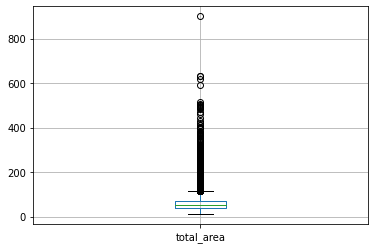

In [26]:
data.boxplot(column='total_area')

<AxesSubplot:>

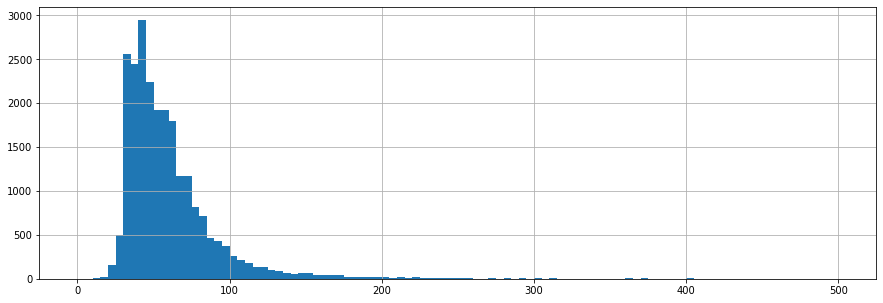

In [27]:
data['total_area'].hist(bins=100, range=(0, 500), figsize=(15,5
                                                          ))

По общей жилой площади можно сказать, что присутсвуют выбросы(площадь более 600 м.кв.), но они обусловлены тем, что в Санкт-Петербурге могут продавать квартиры, которые были комунальными и их сделали под одну квартиру.

#### Жилая площадь

In [28]:
data['living_area'].describe()

count    23565.000000
mean        34.324899
std         21.722006
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

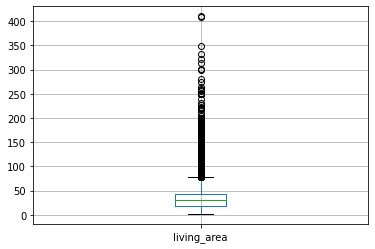

In [29]:
data.boxplot(column='living_area')


<AxesSubplot:>

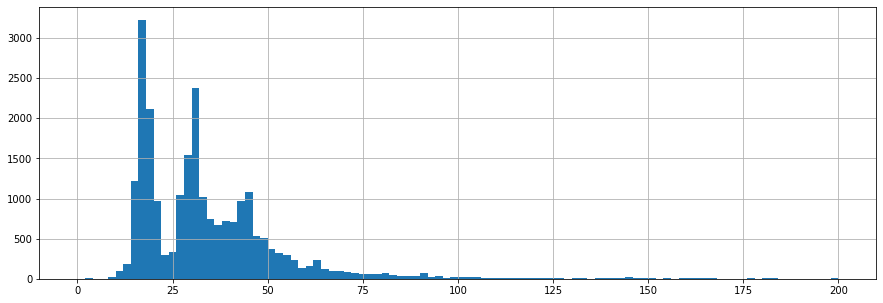

In [30]:
data['living_area'].hist(bins=100, range=(0, 200), figsize=(15, 5))

0.9098829491960255

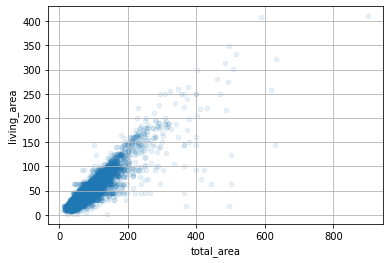

In [31]:
data.plot(x='total_area', y='living_area', kind='scatter', alpha=0.1, grid=True)
data['total_area'].corr(data['living_area'])

Насчет жилой площади в картирах можно сказать то же самое, что и по общей площади, так как они коррелируют между собой. Хоть и на диаграмме рассеяния есть странное явление, что при росте общей площади, жилая площадь остается на одном уровне.

Могли ли бы вы подсказать, пожалуйста. Я сидел работал и решил вернуться к этому пункту, чтобы поставить параметр grid и у меня сразу корреялция взлетела до 0.93 и пропали вот эти странные значения: жилая площадь остается на одном уровне при росте общей площади. Перезапустил ядро и все вернулось обратно.

#### Площадь кухни

In [32]:
data['kitchen_area'].describe()

count    23371.000000
mean        10.454371
std          5.665974
min          1.300000
25%          7.300000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

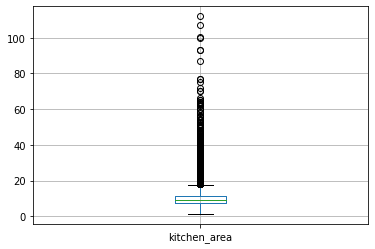

In [33]:
data.boxplot(column='kitchen_area')

<AxesSubplot:>

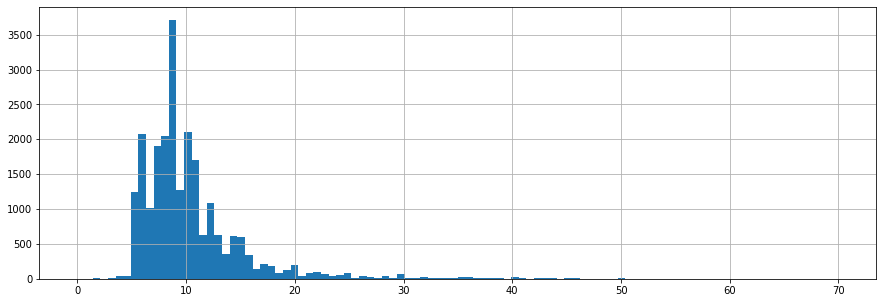

In [34]:
data['kitchen_area'].hist(bins=100, range=(0, 70), figsize=(15, 5))

0.5872117946699851

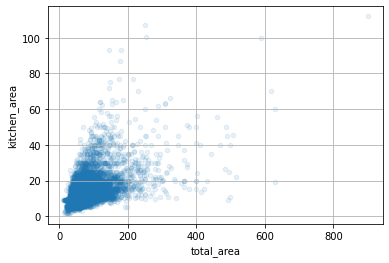

In [35]:
data.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.1, grid=True)
data['total_area'].corr(data['kitchen_area'])

Корреляция снизилась на 30%. Это значит, что с увеличением площади квартиры меньше увеличивается площадь кухонь. Для меня это возможно, логично, потому что я не вижу смысла в увеличении площади кухни.

#### Цена объекта

In [36]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Здесь я увидел экспоненциальное представление цен, поэтому решил создать новый стобец new_price, где поделил значения last_price на 1млн. и цены там будут представлены в миллионах.

In [37]:
data['new_price'] = data['last_price'] / 1000000

In [38]:
data['new_price'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: new_price, dtype: float64

<AxesSubplot:>

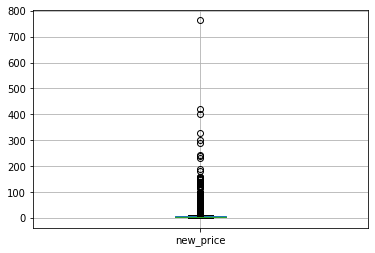

In [39]:
data.boxplot(column='new_price')

<AxesSubplot:ylabel='Frequency'>

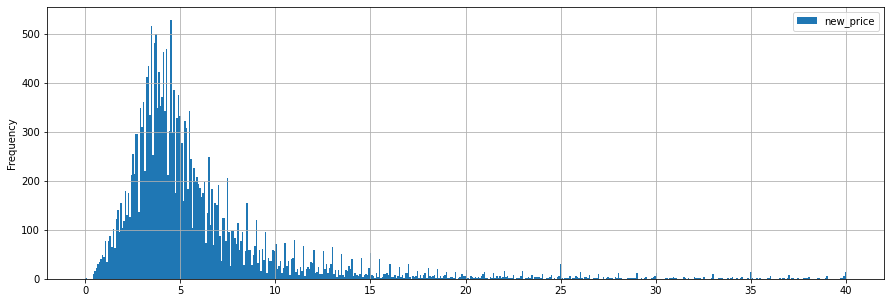

In [40]:
data.plot(y='new_price', kind='hist', bins=500, range=(0,40), figsize=(15, 5), grid=True)

In [41]:
data['new_price'].mode()[0]

4.5

In [42]:
data['new_price'].corr(data['total_area'])

0.6536213939252806

Цены рознятся от 12 190 руб. до 763 миллионов руб.. Больше всего продают квартир за 4,5 миллиона руб.. Выбросы присутсвуют, но они зависят от цены объекта и, как я предполагаю, от нахождения рядом с центром.

#### Количество комнат


In [43]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

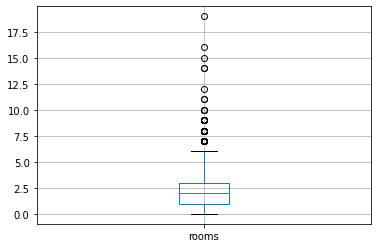

In [44]:
data.boxplot(column='rooms')

<AxesSubplot:>

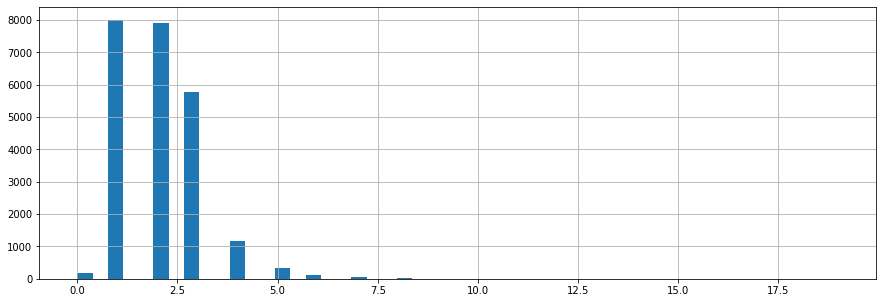

In [45]:
data['rooms'].hist(bins=50, figsize=(15, 5))

In [46]:
data['rooms'].corr(data['total_area'])

0.7587348223341028

Количество комнат в большей степени зависит от общей площади. Но это не значит, что в одинаковых по площадях квартирах будет одинаковое количество комнат, то есть может быть комнат меньше, а площадь их больше.
Про 19-ти комнатные квартиры можно сказать, что это все те же полностью выкупленные коммунальные квартиры.

#### Высота потолков

In [47]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.727815
std          0.299744
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

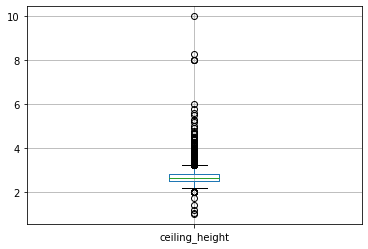

In [48]:
data.boxplot(column='ceiling_height')

<AxesSubplot:>

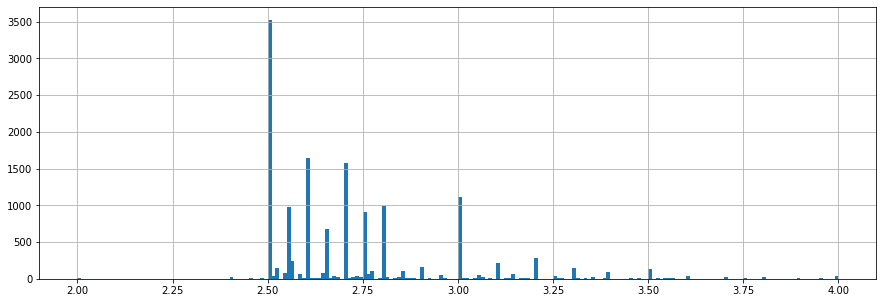

In [49]:
data['ceiling_height'].hist(bins=200, figsize=(15, 5), range=(2, 4))

Высота потолков разниться от 1 м. до 8,3 м.. Больше всего квартир с высотой потолков 2,5 м.. Большие значения обусловлены особенностями домов в Санкт-Петербурге.

#### Этаж квартиры

In [50]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

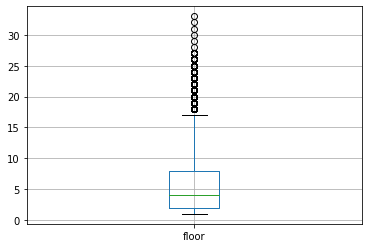

In [51]:
data.boxplot(column='floor')

<AxesSubplot:>

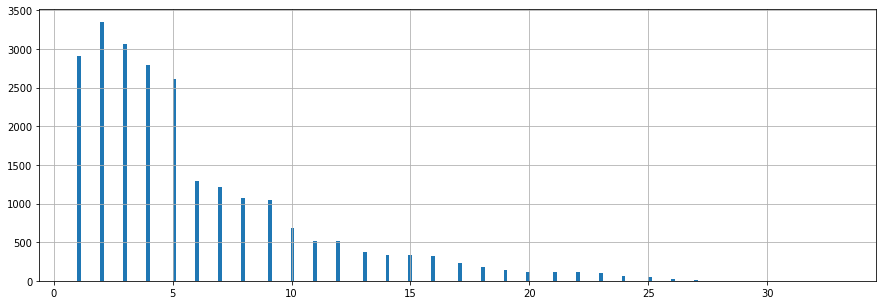

In [52]:
data['floor'].hist(bins=200, figsize=(15, 5))

In [53]:
data['floors_total'].corr(data['floor'])

0.6780095011297615

Больше всего квартир расположено на 2-ом этаже. Этаж квартиры, которая продается, средне зависит от количества этажей в доме. Выбросы отсутствуют.

#### Тип этажа квартиры

In [54]:
data['type_of_floor'].value_counts()

другой       17326
последний     3355
первый        2884
Name: type_of_floor, dtype: int64

Около четверти квартир занимают первый и последний этажи, основная масса квартир расположена между ними.

#### Общее количество этажей в доме

In [55]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

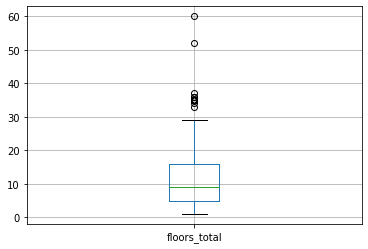

In [56]:
data.boxplot(column='floors_total')

<AxesSubplot:>

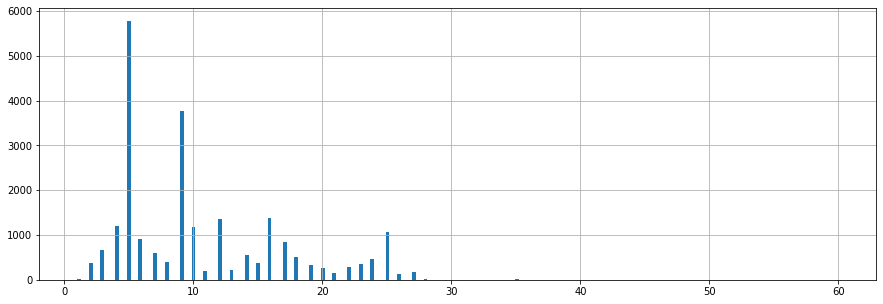

In [57]:
data['floors_total'].hist(bins=200, figsize=(15, 5))

Больше всего 5-ти эатжек. Но присутствуют значения зданий в 52 и 60 этажей. Посмотрев самые высокие данные в Санкт-Петербурге, я могу сделать вывод, что это ошибочные данные, так как такой высоты достигает только Лахта-Центр, где вряд ли будут продавать жилые помещения.

#### Расстояние до центра города в метрах

In [58]:
data['cityCenters_nearest'].describe()

count    18133.000000
mean     14195.267882
std       8610.213514
min        181.000000
25%       9265.000000
50%      13073.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

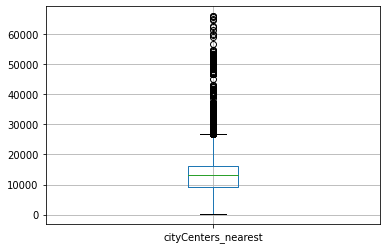

In [59]:
data.boxplot(column='cityCenters_nearest')

<AxesSubplot:>

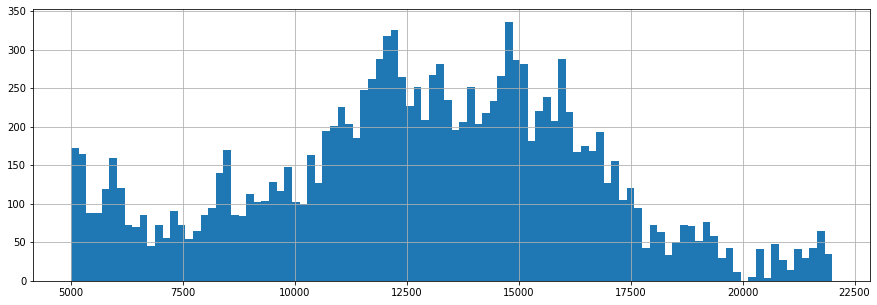

In [60]:
data['cityCenters_nearest'].hist(bins=100, figsize=(15, 5), range=(5000,22000))

In [61]:
data['cityCenters_nearest'].mode()[0]

12242.0

Около 5,5 тыс. объявлений про квартиры на расстоянии 13 км.. Выбросов много, но этот столбец не зависит ни от каких параметров

#### Расстояние до ближайшего аэропорта

In [62]:
data['airports_nearest'].describe()

count    18133.000000
mean     28788.533971
std      12606.251799
min          0.000000
25%      18590.000000
50%      26763.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

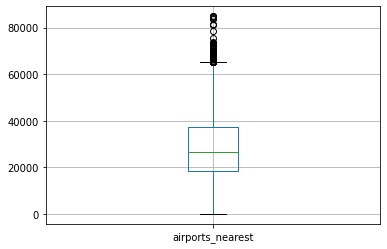

In [63]:
data.boxplot(column='airports_nearest')

<AxesSubplot:>

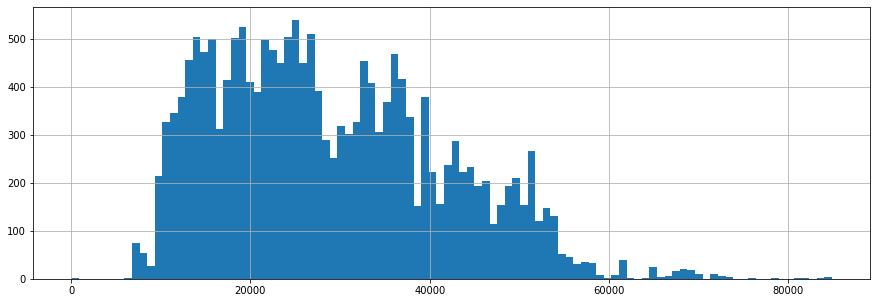

In [64]:
data['airports_nearest'].hist(bins=100, figsize=(15, 5))

Самое популярное расстояние до аэропрта 26,7 км.. Выбросы тоже присутствуют.

#### Расстояние до ближайшего парка

In [65]:
data['parks_nearest'].describe()

count    17579.000000
mean       475.895244
std        234.981831
min          1.000000
25%        433.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

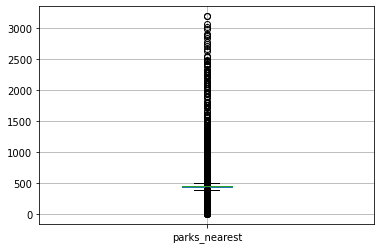

In [66]:
data.boxplot(column='parks_nearest')

<AxesSubplot:>

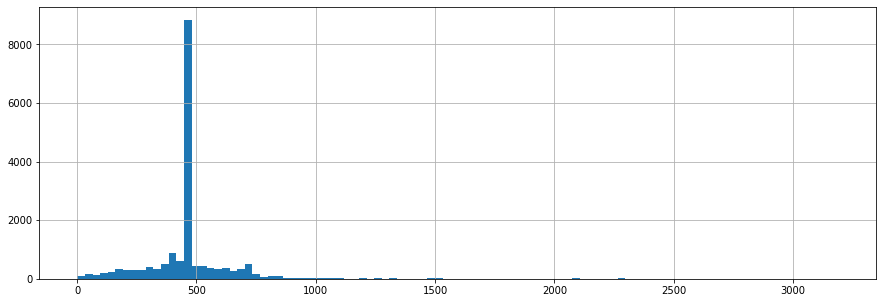

In [67]:
data['parks_nearest'].hist(bins=100, figsize=(15, 5))

Больше всего парков на расстоянии 467 м.. Выбросы присутсвуют, но опят же, я думаю они здесь уместны.

#### День публикации объявления

In [68]:
data['day_of_exposition'].describe()

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_exposition, dtype: float64

<AxesSubplot:>

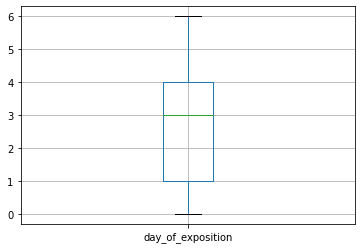

In [69]:
data.boxplot(column='day_of_exposition')

<AxesSubplot:>

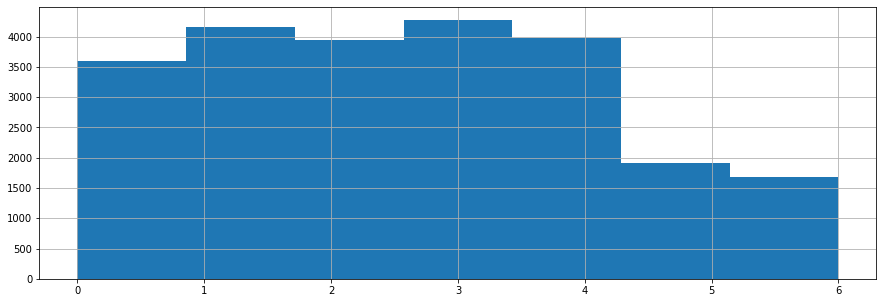

In [70]:
data['day_of_exposition'].hist(bins=7, figsize=(15, 5))

Больше всего объявления размещают по четвергам и вторникам. Меньше всех - на выходных.

#### Месяц публикации объявления

In [71]:
data['month_of_exposition'].describe()

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_exposition, dtype: float64

<AxesSubplot:>

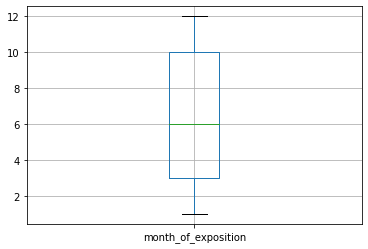

In [72]:
data.boxplot(column='month_of_exposition')

<AxesSubplot:title={'center':'month_of_exposition'}, ylabel='Frequency'>

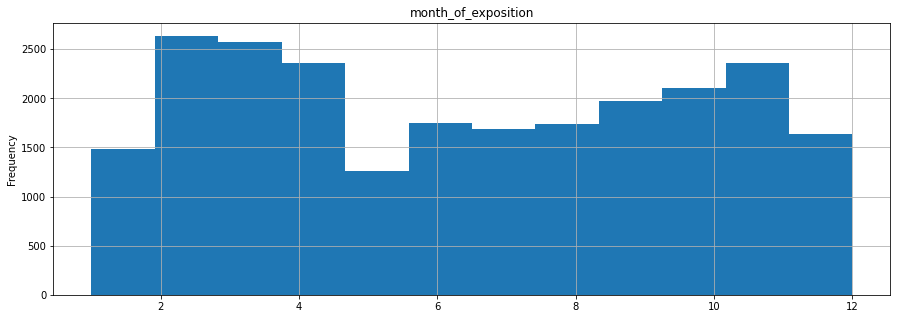

In [73]:
data['month_of_exposition'].plot(kind='hist', figsize=(15, 5), bins=12, title='month_of_exposition', grid=True)

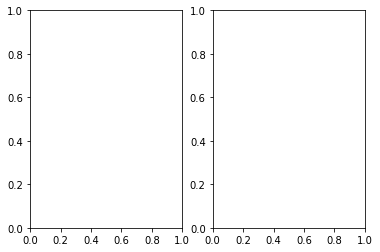

In [74]:
fig = plt.figure()
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
plt.show()

Больше всего размещено объявлений в феврале и марте, меньше всего - в мае.

#### Как быстро продавались квартиры


In [75]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

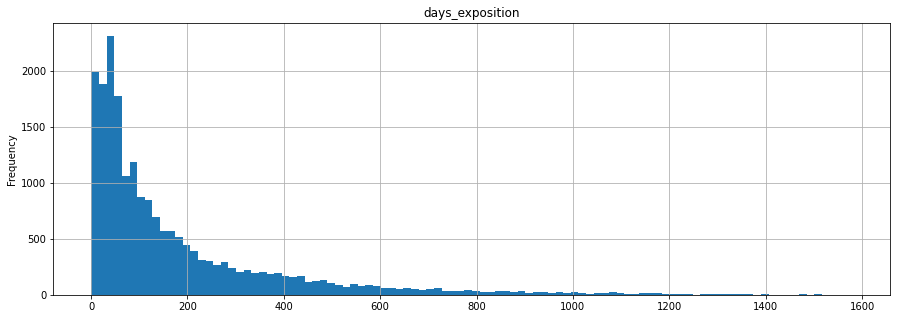

In [76]:
data['days_exposition'].plot(kind='hist', figsize=(15, 5), bins=100, title='days_exposition', grid=True)

<AxesSubplot:>

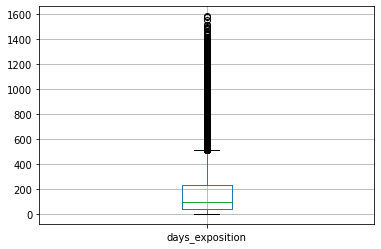

In [77]:
data.boxplot(column='days_exposition')
#plt.ylim(-1, 450)

В среднем квартиры продавались по 163 дня. Медианное количество дней - 74. По диаграмме размаха, можно сказать, что быстрым являются продажи от 45 до 199 дней. Необычно долгие продажи,я считаю, происходят от 430 дней(Q3+1,5 размаха = 199 + 1,5 * (199 - 45) = 430)

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

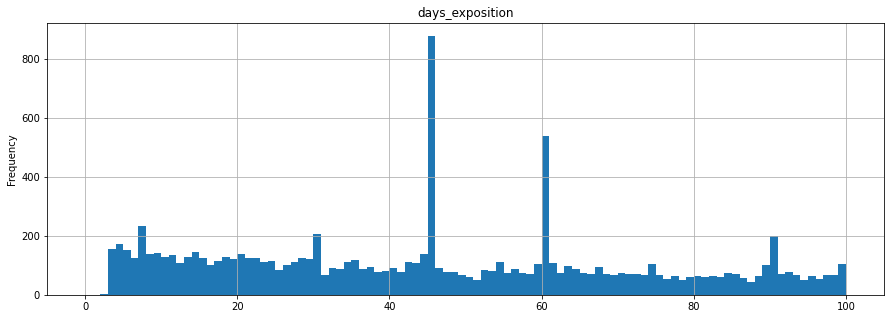

In [78]:
data['days_exposition'].plot(kind='hist', figsize=(15, 5), bins=100, title='days_exposition', grid=True, range=(0,100))

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависит ли цена от общей площади?

In [79]:
data['last_price'].corr(data['total_area'])

0.6536213939252808

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

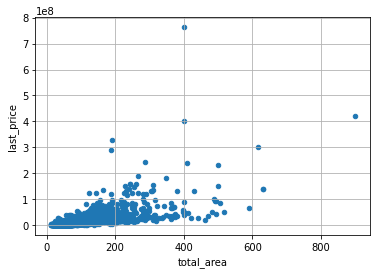

In [80]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True)

Зависимость есть, но на цену влияет но только общая площадь квартиры.

##### Зависит ли цена от жилой площади?

In [81]:
data['last_price'].corr(data['living_area'])

0.5560554214888885

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

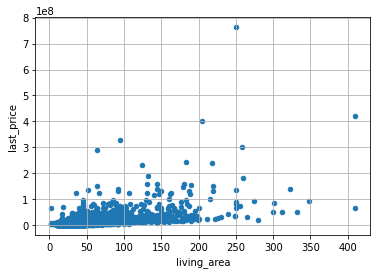

In [82]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True)

Жилая площадь в меньшей степени, чем общая стоимость влияет на цену квартиры.

##### Зависит ли цена от площади кухни?

In [83]:
data['last_price'].corr(data['kitchen_area'])

0.45417008457942204

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

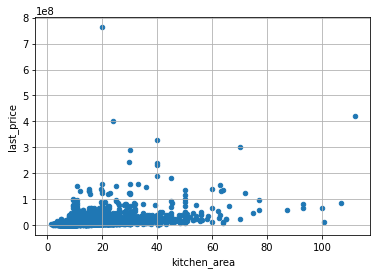

In [84]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)

Площадь кухни еще в более меньшей степени влияет на цену квартиры.

##### Зависит ли цена от количества комнат?

In [85]:
data['last_price'].corr(data['rooms'])

0.3631905485065751

In [86]:
rooms = []
price = []
for col in data['rooms'].unique():
    mean = data.loc[data['rooms']==col, 'last_price'].mean()
    rooms.append(col)
    price.append(mean)
df1 = pd.DataFrame(rooms, price, columns=['rooms'])
df1.index = df1.index / 1000000
df1.sort_values(by='rooms')

,rooms
3.344493,0
3.833870,1
5.587257,2
8.174764,3
13.417916,4
23.798304,5
31.880038,6
51.470069,7
50.224167,8
34.152363,9


##### Зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)?

In [87]:
df_first_floor = data.query('type_of_floor == "первый"')
df_first_floor['new_price'].describe()

count    2884.000000
mean        4.820066
std         5.115116
min         0.430000
25%         2.800000
50%         3.900000
75%         5.402500
max       135.000000
Name: new_price, dtype: float64

In [88]:
df_other_floor = data.query('type_of_floor == "другой"')
df_other_floor['new_price'].describe()

count    17326.000000
mean         6.674349
std          8.630830
min          0.450000
25%          3.600000
50%          4.848500
75%          6.999750
max        330.000000
Name: new_price, dtype: float64

In [89]:
df_last_floor = data.query('type_of_floor == "последний"')
df_last_floor['new_price'].describe()

count    3355.000000
mean        7.325077
std        20.636520
min         0.012190
25%         2.990000
50%         4.300000
75%         6.700000
max       763.000000
Name: new_price, dtype: float64

Так как в данных могут присутсвовать выбросы, то стоит сравнивать медианные значения цен. По ним можно сказать, что самые дешевые квартиры на 1-ом этаже, это обуславлиается как мининум опасностью жить там и большим наличием звуков.
Потом идут квартиры на последнем этаже, их место в середине тоже можно объяснить - если протечет крыша, то осадки могут оппасть в квартиру. 
И самые дорогие квартиры, находящиеся между первым и последним этажами. Поэтому может зависеть от этажа.

##### Зависит ли цена от даты размещения (день недели)?

In [90]:
days = []
price =[]
for col in data['day_of_exposition'].unique():
    mean = data.loc[data['day_of_exposition']==col, 'new_price'].mean()
    days.append(col)
    price.append(mean)
df1 = pd.DataFrame(days, price, columns=['days'])
df1.sort_values(by='days')

,days
6.518332,0
6.389281,1
6.630246,2
6.706766,3
6.359714,4
6.986165,5
6.242137,6


Зависимости цены от дня размещения объявления вообще нет.

##### Зависит ли цена от даты размещения (месяц)?

In [91]:
month = []
price =[]
for col in data['month_of_exposition'].unique():
    mean = data.loc[data['month_of_exposition']==col, 'new_price'].mean()
    month.append(col)
    price.append(mean)
df1 = pd.DataFrame(month, price, columns=['month'])
df1.sort_values(by='month')

,month
6.664171,1
6.463941,2
6.359922,3
6.743395,4
6.591127,5
6.316913,6
6.639479,7
6.345784,8
6.838447,9
6.236776,10


Зависимости цены от месяца размещения объявления тоже нет. Только в декабре цены чуть повыше.

##### Зависит ли цена от даты размещения (год)?

In [92]:
years = []
price =[]
for col in data['year_of_exposition'].unique():
    mean = data.loc[data['year_of_exposition']==col, 'new_price'].mean()
    years.append(col)
    price.append(mean)
df1 = pd.DataFrame(years, price, columns=['years'])
df1.sort_values(by='years')

,years
12.046600,2014
8.595669,2015
6.829117,2016
6.582530,2017
5.954065,2018
6.779324,2019


По средней цене похоже на обратную зависимость с 2014 по 2017 год.

*Больше всего на стоимость квариры влияет общая площадь - корреляция 0,65.*

 #### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [93]:
df = data.pivot_table(index='locality_name', values='price_of_meter', aggfunc=('count', 'mean'))
df = df.sort_values(by='count', ascending=False).head(10)
df

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877341
поселок Мурино,552,85629.568678
поселок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Данные о средней цене одного квадратного метра в 10-ти самых больших по объявлениям населенных пунктов представлены в последнем столбце таблицы. 

#### Средняя цена каждого километра до центра

In [94]:
df_saints = data.query('locality_name=="Санкт-Петербург"').sort_values(by='cityCenters_nearest_km')
df_saints = df_saints.pivot_table(index='cityCenters_nearest_km', values='price_of_meter', aggfunc=('count', 'median', 'mean'))
df_saints['cityCenters_nearest_km'] = df_saints.index 

#Я не особо понял, что такое стоимость каждого км до центра, поэтому я просто посчитал зависимость цен от расстояния до центра.
#Я могу разделить каждую среднюю цену на количество километров по очереди(245833руб. - цена 0 км, 176640/1 - цена первого км, 
# 157944/2 - цена первых двух км. Но они же не будут совпадать - для каждого километра будет разная цена километра)

Средние и медианные цены, в зависимости от растояния до центра представлены в таблице.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

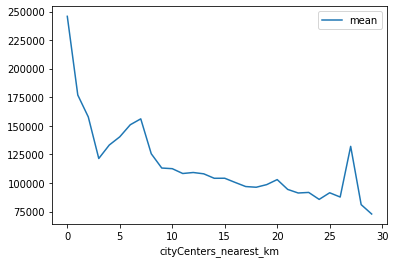

In [95]:
df_saints.plot( x="cityCenters_nearest_km", y='mean')

In [96]:
df_saints['cityCenters_nearest_km'].corr(df_saints['mean'])

-0.7694410425911339

В итоге можно сказать, что расттояние до центра сильно коррелирует со средней и медианной ценой одного квадратного метра - чем больше расстояние от центра, тем меншье цена(обратная зависимость).

### Общий вывод

Мною было проведенно иследование на основании данных о продаже квартир, я ответил на следющие задаваемые вопросы:

**1)Как быстро продавались квартиры? И какие продажи можно назвать быстрыми, а какие - долгими?**

*В среднем квартиры продавались по 163 дня. Медианное количество дней - 74. По диаграмме размаха, можно сказать, что быстрым являются продажи от 45 до 199 дней. Необычно долгие продажи,я считаю, происходят от 430 дней(на основе рассчетов).*

**2)Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

*Больше всего на стоимость объекта влияет общая площадь квартиры. Жилая площадь больше влияет на стоимость объекта, чем площадь кухни. И в более меньшей степени на стоимость квартиры влияет количество комнат и тип этажа. Дата размещения объявдения никак не влияет на стоимость объекта.*

**3)Какая средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?**

*В Санкт-Петербурге цена одного квадратного метра в среднем равна 124421 руб., в поселке Мурино - 83081 руб., в поселке Шушары - 76328 руб., во Всеволожске - 67635 руб., в городе Пушкин - 105097 руб., в Колпино - 74467 руб., в поселке Парголово - 87110 руб., в Гатчине - 68475 руб., в деревне Кудрово - 90916 руб., в Выборге - 57898 руб..*

**4)Как стоимость объектов зависит от расстояния до центра города?**

*Можно сказать, что расттояние до центра сильно коррелирует со средней и медианной ценой одного квадратного метра - чем больше расстояние от центра, тем меншье цена(обратная зависимость).*